In [1]:
#Importing pandas and Path
import pandas as pd
from pathlib import Path

In [2]:
#Importing json files from Postman
btc_json = pd.read_json('bitcoin.json')
peso_json = pd.read_json('MXN_peso.json')
cad_json = pd.read_json('CAD_dollar.json')

#Saving json files as CSV files
btc_json.to_csv('btc_data.csv')
peso_json.to_csv('peso_data.csv')
cad_json.to_csv('cad_data.csv')

In [3]:
#Setting variables for CSV files
btc_data = pd.read_csv(Path('btc_data.csv'))
peso_data = pd.read_csv(Path('peso_data.csv'))
cad_data = pd.read_csv(Path('cad_data.csv'))

In [4]:
#Cleaning up Bitcoin data, removing extra rows and columns
btc_df = btc_data.drop(index=[1831, 1832], columns=['disclaimer', 'time'])
#Renaming columns to more uniform names
btc_df.rename(columns={'Unnamed: 0':'Date','bpi':'BTC to USD'}, inplace=True)
#Grouping by date
btc_grp = btc_df.groupby('Date').sum()
#Displaying sample
btc_grp.head()

,BTC to USD
Date,
2013-09-01,128.2597
2013-09-02,127.3648
2013-09-03,127.5915
2013-09-04,120.5738
2013-09-05,120.5333


In [5]:
#Cleaning up Mexican Peso data, removing extra rows and columns
peso_df = peso_data.drop(['start_at', 'base', 'end_at'], axis=1)
#Renaming columns to more uniform names
peso_df.rename(columns={'Unnamed: 0':'Date', 'rates':'MXN to USD'}, inplace=True)
#Grouping by date
peso_grp = peso_df.groupby('Date').sum()
#Removing special characters (except for . to maintain decimals)
peso_grp['MXN to USD'] = peso_grp['MXN to USD'].str.replace("'USD':", '').str.strip('{}')
#Displaying sample
peso_grp.head()

,MXN to USD
Date,
2013-09-02,0.0752445576
2013-09-03,0.0744879378
2013-09-04,0.0750215023
2013-09-05,0.0745808289
2013-09-06,0.075046915


In [6]:
#Cleaning up Canadian Dollar data, removing extra rows and columns
cad_df = cad_data.drop(['start_at', 'base', 'end_at'], axis=1)
#Renaming columns to more uniform names
cad_df.rename(columns={'Unnamed: 0':'Date', 'rates':'CAD to USD'}, inplace=True)
#Grouping by date
cad_grp = cad_df.groupby('Date').sum()
#Removing special characters (except for . to maintain decimals)
cad_grp['CAD to USD'] = cad_grp['CAD to USD'].str.replace("'USD':", '').str.strip('{}')
#Displaying sample
cad_grp.head()

,CAD to USD
Date,
2013-09-02,0.9496656360000001
2013-09-03,0.9500865551000001
2013-09-04,0.9534530187
2013-09-05,0.9541085495
2013-09-06,0.9587048677000001


In [7]:
#Concatenating lists, index set to Date
currency_data = pd.concat([cad_grp, peso_grp, btc_grp], axis="columns", join="inner")
#Exporting DataFrame to CSV file currency_data.csv
currency_data.to_csv("currency_data.csv")

currency_data.head()

,CAD to USD,MXN to USD,BTC to USD
Date,,,
2013-09-02,0.9496656360000001,0.0752445576,127.3648
2013-09-03,0.9500865551000001,0.0744879378,127.5915
2013-09-04,0.9534530187,0.0750215023,120.5738
2013-09-05,0.9541085495,0.0745808289,120.5333
2013-09-06,0.9587048677000001,0.075046915,116.3210


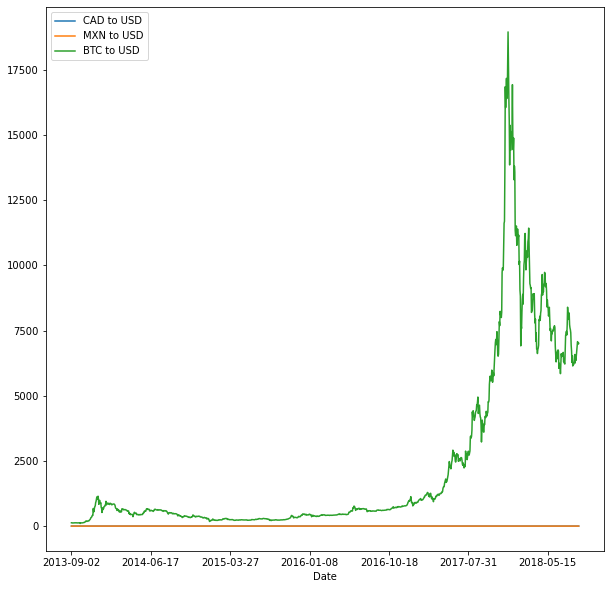

In [21]:
#Compare (plot) volatilty of the 4 currencies 
currency_data.plot(figsize=(10,10));

#Pull historics from Canada, use currency converter to go from looney to USD.

#Create csv file with new converted currency

#Pull historics from Mexico, use currency converter to go from peso to USD

#Create csv file with new converted currency


##Note this shows extreme volatility in bitcoin relative to the other currencies. See below graph for closer insight on Peso & Looney

In [17]:
currency_data.dtypes

CAD to USD    float64
MXN to USD    float64
BTC to USD    float64
dtype: object

In [14]:
currency_data['CAD to USD'] = currency_data['CAD to USD'].astype("float")

In [16]:
currency_data['MXN to USD'] = currency_data['MXN to USD'].astype("float")

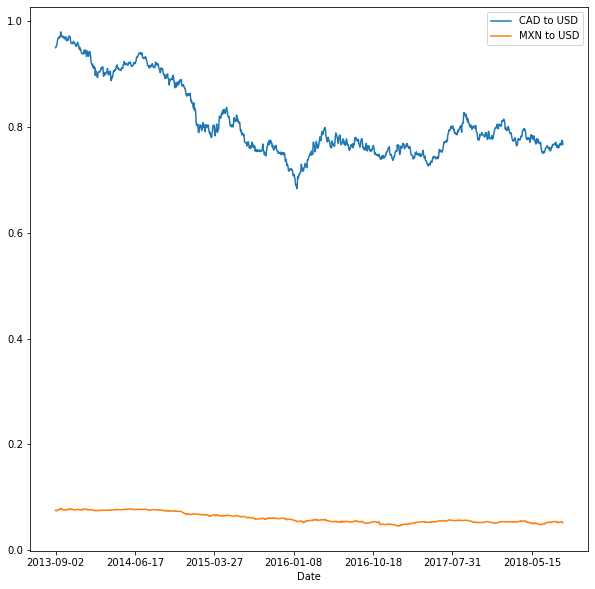

In [20]:
currency_data[["CAD to USD","MXN to USD"]].plot(figsize=(10,10));